In [1]:
%load_ext oct2py.ipython

## Load and plot raw data.

Area(sq.ft.)   No. of Bedrooms  Price
ans =

     2104        3  3.999e+05
     1600        3  3.299e+05
     2400        3  3.69e+05
     1416        2  2.32e+05
     3000        4  5.399e+05
     1985        4  2.999e+05
     1534        3  3.149e+05
     1427        3  1.99e+05
     1380        3  2.12e+05
     1494        3  2.425e+05
     1940        4  2.4e+05
     2000        3  3.47e+05
     1890        3  3.3e+05
     4478        5  6.999e+05
     1268        3  2.599e+05
     2300        4  4.499e+05
     1320        2  2.999e+05
     1236        3  1.999e+05
     2609        4    5e+05
     3031        4  5.99e+05
     1767        3  2.529e+05
     1888        2  2.55e+05
     1604        3  2.429e+05
     1962        4  2.599e+05
     3890        3  5.739e+05
     1100        3  2.499e+05
     1458        3  4.645e+05
     2526        3  4.69e+05
     2200        3  4.75e+05
     2637        3  2.999e+05
     1839        2  3.499e+05
     1000        1  1.699e+05
     2040 

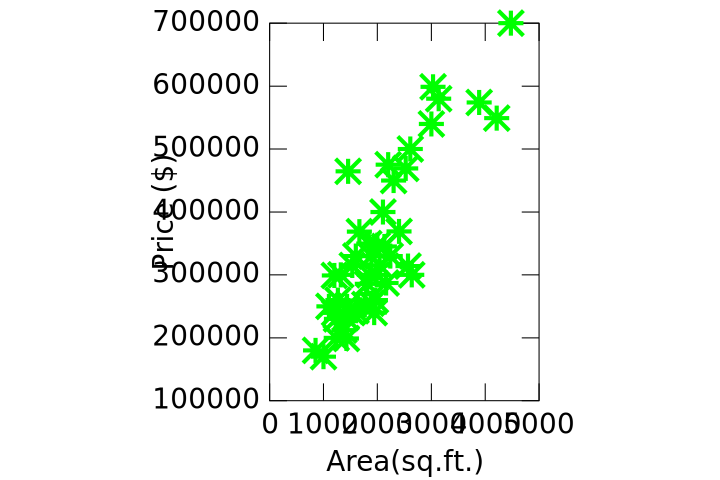

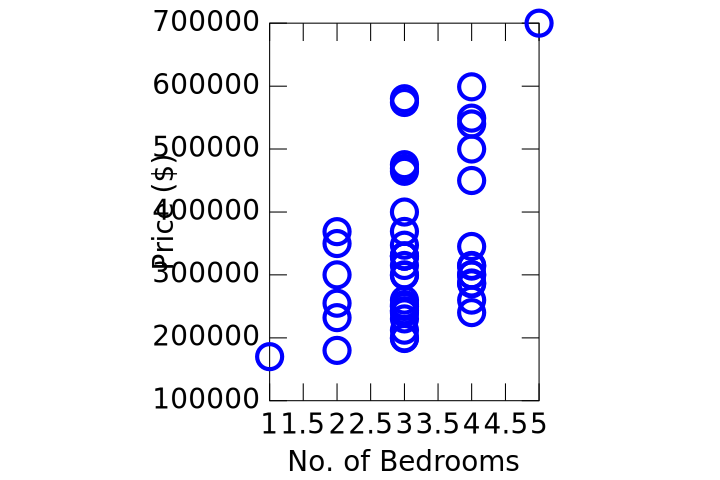

In [2]:
%%octave -f svg -s 720,480

x = load('ml2x.dat');
y = load('ml2y.dat');

disp("  Area(sq.ft.)   No. of Bedrooms  Price")
[x y]

m = length(x)

figure, plot(x(:,1),y,'gh', 'markerfacecolor', 'auto');
xlabel('Area(sq.ft.)');
ylabel('Price ($)');

figure, plot(x(:,2),y,'bo');
xlabel('No. of Bedrooms');
ylabel('Price ($)');

## Preprocess data

m =  47

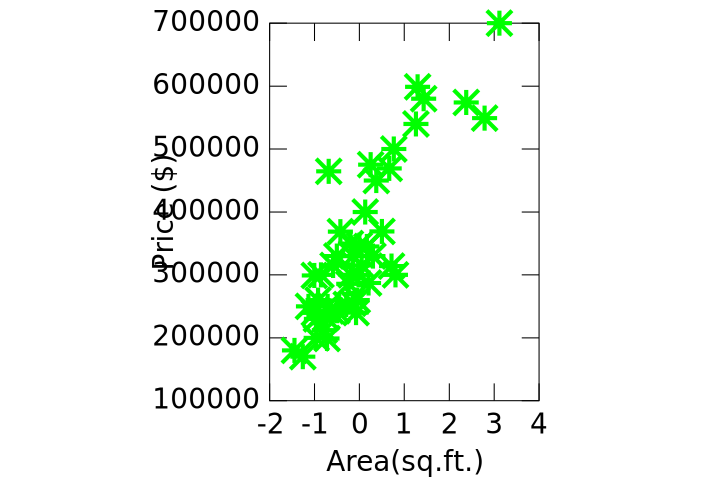

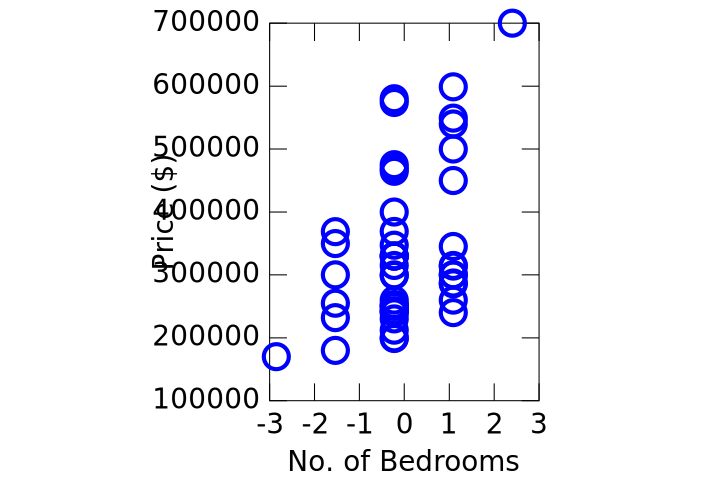

In [3]:
%%octave -f svg -s 720,480

x = load('ml2x.dat');
y = load('ml2y.dat');

m = length(x)

%Append x0 = 1
x = [ones(m,1) x];

%Preprocess
sigma = std(x);
mu = mean(x);
x(:,2) = (x(:,2) - mu(2))./ sigma(2);
x(:,3) = (x(:,3) - mu(3))./ sigma(3);

figure, plot(x(:,2),y,'gh', 'markerfacecolor', 'auto');
xlabel('Area(sq.ft.)');
ylabel('Price ($)');

figure, plot(x(:,3),y,'bo');
xlabel('No. of Bedrooms');
ylabel('Price ($)');

## Selecting the Learning Rate

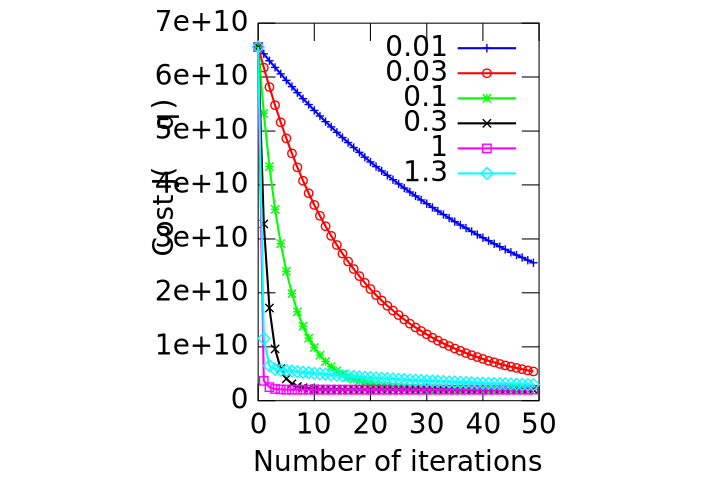

In [4]:
%%octave -f svg -s 720,480

x = load('ml2x.dat');
y = load('ml2y.dat');

m = length(x);

%Append x0 = 1
x = [ones(m,1) x];

%Preprocess
sigma = std(x);
mu = mean(x);
x(:,2) = (x(:,2) - mu(2))./ sigma(2);
x(:,3) = (x(:,3) - mu(3))./ sigma(3);

plotstyle = {'b+-', 'ro-', 'g*-', 'kx-', 'ms-', 'cd-'};

% Gradient Descent 
alpha = [0.01, 0.03, 0.1, 0.3, 1, 1.3];
MAX_ITR = 100;
theta_grad_descent = zeros(size(x(1,:))); 

for i = 1:length(alpha)
    theta = zeros(size(x(1,:)))'; % initialize fitting parameters
    J = zeros(MAX_ITR, 1);
    for num_iterations = 1:MAX_ITR
        % Calculate the J term
        J(num_iterations) = (1/(2*m)) .* (x * theta - y)' * (x * theta - y);
        
        % The gradient
        grad = (1/m) .* x' * ((x * theta) - y);
        
        % Here is the actual update
        theta = theta - alpha(i) .* grad;
    end
    % Now plot the first 50 J terms
    plot(0:49, J(1:50), char(plotstyle(i)), 'LineWidth', 1, 'MarkerSize',2)
    hold on
    
    % Trial and error
    if (alpha(i) == 1)
        theta_grad_descent = theta;
    end
end
legend('0.01','0.03','0.1', '0.3', '1', '1.3')
xlabel('Number of iterations')
ylabel('Cost J(\theta)')

## For large value of alpha

alpha =  1.5000

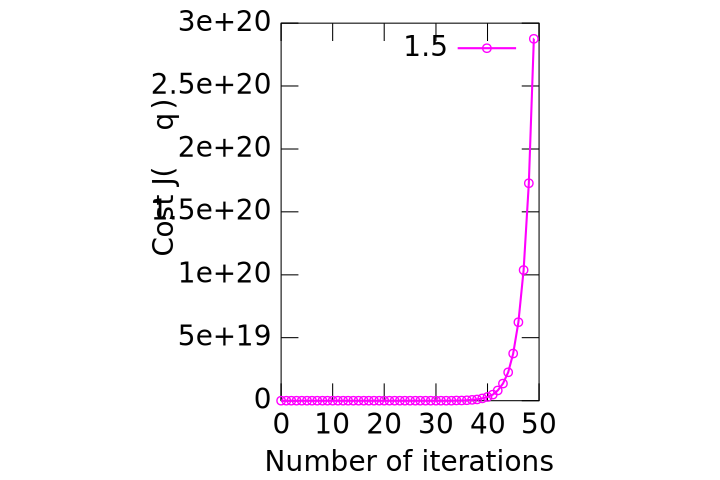

In [5]:
%%octave -f svg -s 720,480

x = load('ml2x.dat');
y = load('ml2y.dat');

m = length(x);

%Append x0 = 1
x = [ones(m,1) x];

%Preprocess
sigma = std(x);
mu = mean(x);
x(:,2) = (x(:,2) - mu(2))./ sigma(2);
x(:,3) = (x(:,3) - mu(3))./ sigma(3);
 

% Gradient Descent 
alpha = 1.5
MAX_ITR = 100;
theta_grad_descent = zeros(size(x(1,:))); 

for i = 1:length(alpha)
    theta = zeros(size(x(1,:)))'; % initialize fitting parameters
    J = zeros(MAX_ITR, 1);
    for num_iterations = 1:MAX_ITR
        % Calculate the J term
        J(num_iterations) = (1/(2*m)) .* (x * theta - y)' * (x * theta - y);
        
        % The gradient
        grad = (1/m) .* x' * ((x * theta) - y);
        
        % Here is the actual update
        theta = theta - alpha(i) .* grad;
    end
    
    % plot the first 50 J terms
    plot(0:49, J(1:50), 'mo-', 'LineWidth', 1, 'MarkerSize',2)
    hold on
end
legend('1.5')
xlabel('Number of iterations')
ylabel('Cost J(\theta)')

## Prediction

In [10]:
%%octave -f svg

x = load('ml2x.dat');
y = load('ml2y.dat');

format long

m = length(x);

%Append x0 = 1
x = [ones(m,1) x];

x_unscaled = x;
y_unscaled = y;

%Preprocess
sigma = std(x);
mu = mean(x);
x(:,2) = (x(:,2) - mu(2))./ sigma(2);
x(:,3) = (x(:,3) - mu(3))./ sigma(3);

% Gradient Descent 
alpha = 1.0
MAX_ITR = 100;
theta_grad_descent = zeros(size(x(1,:))); 

for i = 1:length(alpha)
    theta = zeros(size(x(1,:)))';  
    J = zeros(MAX_ITR, 1);
    
    for num_iterations = 1:MAX_ITR
        
        % Calculate the J term
        J(num_iterations) = (1/(2*m)) .* (x * theta - y)' * (x * theta - y);
        
        % The gradient
        grad = (1/m) .* x' * ((x * theta) - y);
        
        % Here is the actual update
        theta = theta - alpha(i) .* grad;
    end
end

theta_grad_descent = theta;

price_grad_desc = dot(theta_grad_descent, [1, (1650 - mu(2))/sigma(2),(3 - mu(3))/sigma(3)]);

printf("theta_grad_descent = [%0.2f; %0.2f; %0.2f] \n", theta_grad_descent(1), theta_grad_descent(2), theta_grad_descent(3));

printf("The price prediction using gradient descent is $%0.2f.\n", price_grad_desc);

theta_normal = (x_unscaled' * x_unscaled)\x_unscaled' * y;
                
price_normal = dot(theta_normal, [1, 1650, 3]);
                
printf("theta_normal = [%0.2f; %0.2f; %0.2f] \n", theta_normal(1), theta_normal(2), theta_normal(3));
                
printf("The price prediction using Normal equation is $%0.2f.\n", price_normal);

alpha =  1
theta_grad_descent = [340412.66; 110631.05; -6649.47] 
The price prediction using gradient descent is $293081.46.
theta_normal = [89597.91; 139.21; -8738.02] 
The price prediction using Normal equation is $293081.46.

-mkc